# Import Libraries and dataset

In [1]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_curve, roc_auc_score
import warnings

df = pd.read_csv('../../65 Years of Weather Data Bangladesh (1948 - 2013).csv')

# Category 2.2

In [2]:
# Players to be selected
# li = ["Barisal","Bhola","Khepupara","Khulna","Mongla","Patuakhali","Hatiya"]

li = ["Ishurdi","Jessore","Chuadanga","Satkhira"]
df_new=df[df.Station_Names.isin(li)]
df_new=df_new.drop(labels=["No","Station_Names","YEAR","Month","ALT","Station_Number"], axis=1)
df_new.head()

,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,X_COR,Y_COR,LATITUDE,LONGITUDE,Period
3576,26.5,9.1,9.0,79.333333,0.8,1.053846,5.911111,0.0,0.0,23.65,88.81667,1989.01
3577,31.0,10.9,9.0,79.333333,0.5,1.053846,5.911111,0.0,0.0,23.65,88.81667,1990.01
3578,29.7,11.1,9.0,79.333333,0.3,1.053846,5.911111,0.0,0.0,23.65,88.81667,1991.01
3579,28.6,10.8,9.0,79.333333,0.1,1.053846,5.911111,0.0,0.0,23.65,88.81667,1992.01
3580,30.0,10.1,9.0,79.333333,0.4,1.053846,5.911111,0.0,0.0,23.65,88.81667,1993.01


In [3]:
z = df_new["Wind_Speed"]

# df_new = df_new.drop(labels=["Wind_Speed","X_COR","Y_COR","Bright_Sunshine"], axis=1)
df_new = df_new.drop(labels=["Wind_Speed","X_COR","Y_COR",], axis=1)
df_new['Wind_Speed'] = z
df_new.head()

,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Cloud_Coverage,Bright_Sunshine,LATITUDE,LONGITUDE,Period,Wind_Speed
3576,26.5,9.1,9.0,79.333333,1.053846,5.911111,23.65,88.81667,1989.01,0.8
3577,31.0,10.9,9.0,79.333333,1.053846,5.911111,23.65,88.81667,1990.01,0.5
3578,29.7,11.1,9.0,79.333333,1.053846,5.911111,23.65,88.81667,1991.01,0.3
3579,28.6,10.8,9.0,79.333333,1.053846,5.911111,23.65,88.81667,1992.01,0.1
3580,30.0,10.1,9.0,79.333333,1.053846,5.911111,23.65,88.81667,1993.01,0.4


In [4]:
X = df_new.iloc[:,:-1]
Y = df_new.iloc[:,-1]

In [5]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2)

# Preprocessiong with Standard Scaler 

In [6]:
# Standard Scaler

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

# Random Forest Regression

In [7]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(trainX, trainY) 

#  Prediction
Y_pred_RF = regressor.predict(testX)

df_temp = pd.DataFrame({'Actual': testY, 'Predicted': Y_pred_RF})
df_temp.head()

,Actual,Predicted
9982,3.000000,2.721611
17623,1.925926,1.978574
17457,2.200000,2.005963
17541,1.300000,0.751000
18020,0.812963,0.818278


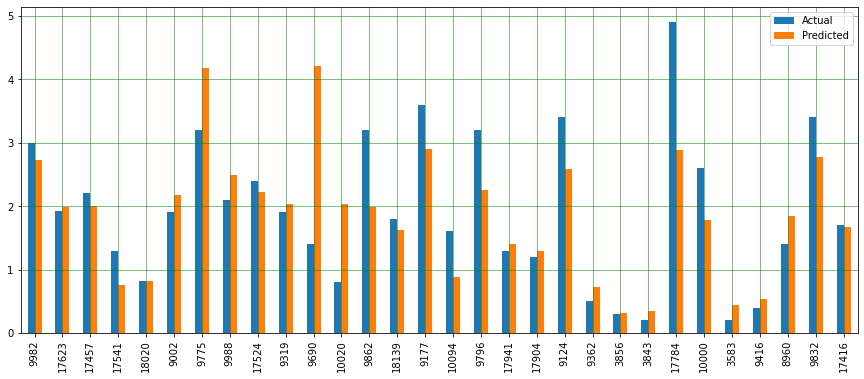

In [8]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(15,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

In [9]:
from sklearn.metrics import r2_score
score= r2_score(testY,Y_pred_RF)
score

0.7569955953176852

In [10]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(testY, Y_pred_RF))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, Y_pred_RF))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, Y_pred_RF)))

Mean Absolute Error: 0.3904894946769445
Mean Squared Error: 0.35040226364692295
Root Mean Squared Error: 0.5919478555134083


# XGBoost Regression

In [11]:
from xgboost import XGBRegressor

RegModel=XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=500, objective='reg:linear', booster='gbtree')
XGB=RegModel.fit(trainX_scaled,trainY)
prediction_XGB=XGB.predict(testX_scaled)

[16:14:07] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [12]:
df_temp = pd.DataFrame({'Actual': testY, 'Predicted': prediction_XGB})
df_temp.head()

,Actual,Predicted
9982,3.000000,2.973716
17623,1.925926,2.069893
17457,2.200000,1.834665
17541,1.300000,0.827918
18020,0.812963,0.687628


In [13]:
#Measuring Goodness of fit in Training data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(testY, prediction_XGB))

print('Mean Absolute Error:', metrics.mean_absolute_error(testY, prediction_XGB))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, prediction_XGB))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, prediction_XGB)))

R2 Value: 0.7665777707445761
Mean Absolute Error: 0.3936111438509645
Mean Squared Error: 0.33658516446868386
Root Mean Squared Error: 0.5801596025824995


# MLP Regression

In [14]:
# MLPRegressor

from sklearn.neural_network import MLPRegressor

mlp_reg = MLPRegressor(hidden_layer_sizes=(150,100,50),
                       max_iter = 300,activation = 'relu',
                       solver = 'adam')

mlp_reg.fit(trainX_scaled, trainY)

MLPRegressor(hidden_layer_sizes=(150, 100, 50), max_iter=300)

In [15]:
y_pred = mlp_reg.predict(testX_scaled)
df_temp = pd.DataFrame({'Actual': testY, 'Predicted': y_pred})
df_temp.head()

,Actual,Predicted
9982,3.000000,2.974664
17623,1.925926,2.528497
17457,2.200000,2.495918
17541,1.300000,0.711207
18020,0.812963,0.754161


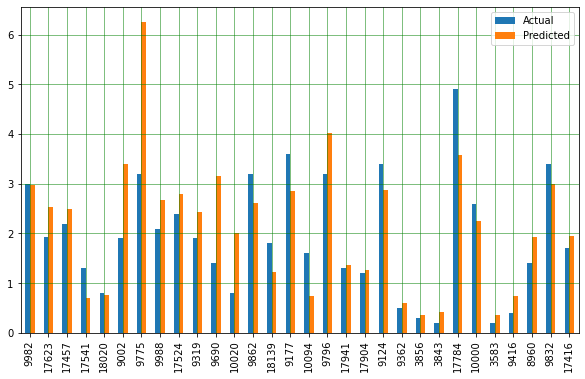

In [16]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

Text(0, 0.5, 'Cost')

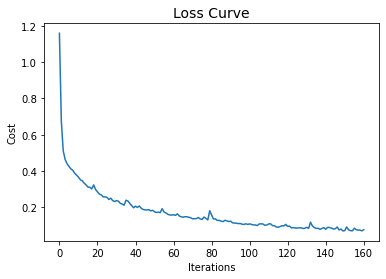

In [17]:
plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')

In [18]:
from sklearn.metrics import r2_score
score= r2_score(testY,y_pred)
score

0.6867187137455933

In [19]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(mlp_reg, param_grid, n_jobs= -1, cv=5)
grid.fit(trainX_scaled, trainY)

print(grid.best_params_) 

{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'adam'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [20]:
grid_predictions = grid.predict(testX_scaled) 
df_temp2 = pd.DataFrame({'Actual': testY, 'Predicted': grid_predictions})
df_temp2.head()

,Actual,Predicted
9982,3.000000,2.717421
17623,1.925926,1.614696
17457,2.200000,2.134440
17541,1.300000,0.847983
18020,0.812963,0.511835


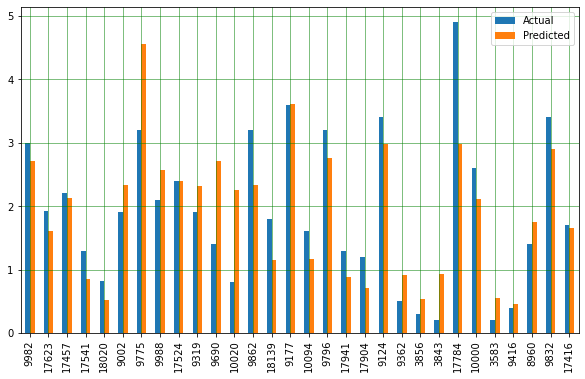

In [21]:
df_temp2 = df_temp2.head(30)
df_temp2.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

In [22]:
#Measuring Goodness of fit in Training data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(testY, grid_predictions))

print('Mean Absolute Error:', metrics.mean_absolute_error(testY, grid_predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, grid_predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, grid_predictions)))

R2 Value: 0.7218052999074979
Mean Absolute Error: 0.4739750827690115
Mean Squared Error: 0.40114520876453863
Root Mean Squared Error: 0.6333602519613452


In [23]:
mean_pred=( Y_pred_RF+prediction_XGB+ grid_predictions)/3
df_temp2 = pd.DataFrame({'Actual': testY, 'pred_RF': Y_pred_RF,'pred_XGB':prediction_XGB,'pred_MLP': grid_predictions,'mean_pred':mean_pred})
df_temp2.head()

,Actual,pred_RF,pred_XGB,pred_MLP,mean_pred
9982,3.000000,2.721611,2.973716,2.717421,2.804249
17623,1.925926,1.978574,2.069893,1.614696,1.887721
17457,2.200000,2.005963,1.834665,2.134440,1.991689
17541,1.300000,0.751000,0.827918,0.847983,0.808967
18020,0.812963,0.818278,0.687628,0.511835,0.672580


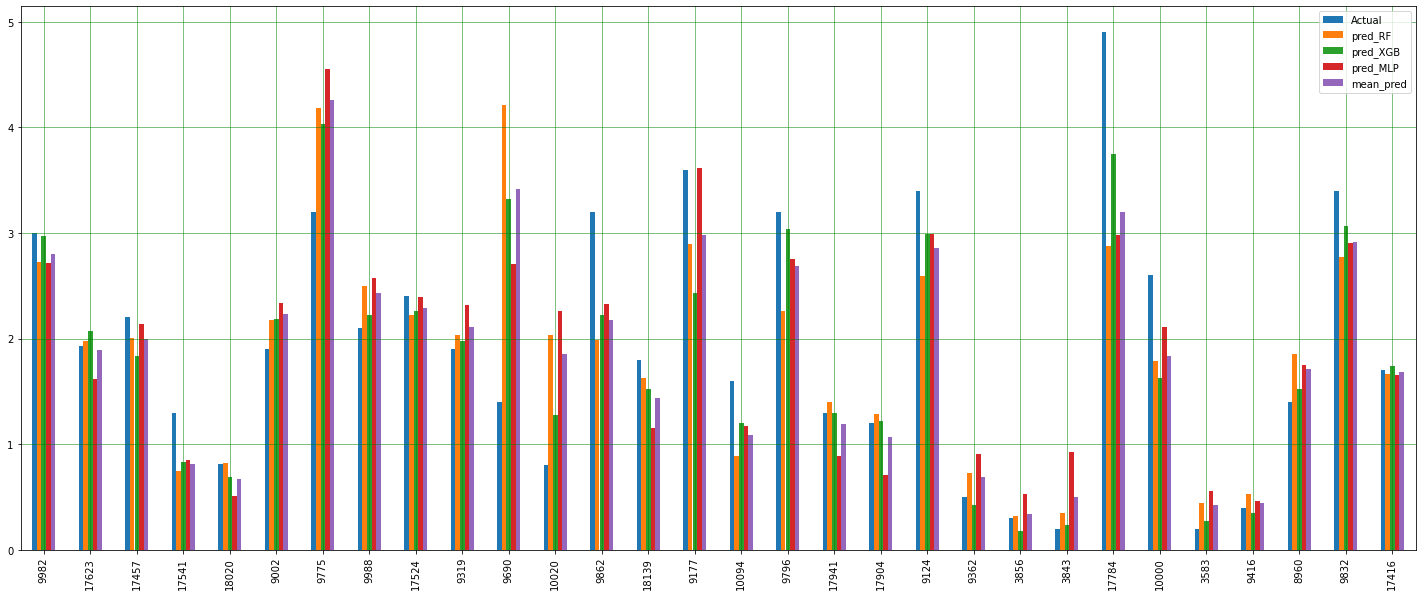

In [24]:
df_temp2 = df_temp2.head(30)
df_temp2.plot(kind='bar',figsize=(25,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

In [25]:
mean_pred=( Y_pred_RF+prediction_XGB+ grid_predictions)/3
df_temp2 = pd.DataFrame({'Actual': testY, 'mean_pred':mean_pred})
df_temp2.head()

,Actual,mean_pred
9982,3.000000,2.804249
17623,1.925926,1.887721
17457,2.200000,1.991689
17541,1.300000,0.808967
18020,0.812963,0.672580


In [26]:
print('R2 Value:',metrics.r2_score(testY, mean_pred)*100,"%")
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, mean_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, mean_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, mean_pred)))

R2 Value: 78.54225918562665 %
Mean Absolute Error: 0.3852802853517345
Mean Squared Error: 0.3094117147355804
Root Mean Squared Error: 0.5562478896459566
